time:10.1 图片质量: 614.061282


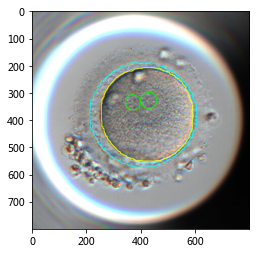

In [1]:
from util import *
import pprint 
annotates = load_annotates()  # 读取胚胎所有的标注信息

# 查看图片质量 和 标注信息
show_annotate(annotates[50])

In [2]:
# 曲线所围图片的 面积和重心点的计算,比如
points = np.array([[[100,100], [100,200], [200,200], [200,100]]]) # 
M = cv2.moments( points );  # 计算中心矩
print('曲线 面积：%d   重心坐标:(%d,%d)' % ( int(M['m00']), int(round(M["m10"]/M['m00'])) ,int(round(M["m01"]/M['m00'])) ) )

曲线 面积：10000   重心坐标:(150,150)


In [3]:
moments = moments_pn(annotates)     # 计算单细胞时期(只需要识别到1个原核和2个原核的标注数据)的面积和重心坐标
# 查看这些原核的面积和重心坐标
pprint.pprint(moments)


[{'pns': [[2248, 371, 355]], 'time': 8.3},
 {'pns': [[2486, 429, 345]], 'time': 8.4},
 {'pns': [[2130, 371, 345]], 'time': 8.6},
 {'pns': [[2250, 372, 349]], 'time': 8.8},
 {'pns': [[2686, 373, 347], [1960, 426, 341]], 'time': 9.0},
 {'pns': [[2418, 369, 340], [2486, 424, 341]], 'time': 9.2},
 {'pns': [[2352, 371, 338]], 'time': 9.4},
 {'pns': [[2738, 426, 325], [2136, 372, 332]], 'time': 9.5},
 {'pns': [[2476, 371, 336], [2446, 424, 326]], 'time': 9.7},
 {'pns': [[2306, 372, 332], [2676, 423, 330]], 'time': 9.9},
 {'pns': [[2724, 428, 327], [2384, 370, 334]], 'time': 10.1},
 {'pns': [[2498, 373, 339], [2552, 428, 330]], 'time': 10.3},
 {'pns': [[2502, 376, 331], [2476, 432, 328]], 'time': 10.5},
 {'pns': [[2616, 375, 337], [2576, 432, 328]], 'time': 10.7},
 {'pns': [[2442, 378, 339], [2792, 435, 328]], 'time': 10.8},
 {'pns': [[2782, 375, 333], [2738, 439, 329]], 'time': 11.0},
 {'pns': [[2894, 379, 339], [2490, 440, 330]], 'time': 11.2},
 {'pns': [[2874, 378, 342], [3040, 441, 332]],

In [4]:
# 因为细胞的原核面积会随着时间流逝而长大， 所以不能用某一张图片中的原核面积作为原核面积,而是用一个指数函数来拟合

# 保证既有单原核时期的标注数据 又要保证有一定数量(至少用6个原核的面积来拟合)的双原核时期的标注 pos = pos_pn2(moments)              
# 得到双原核开始的位置
pos = pos_pn2(moments)  
if pos>=0 and pos<len( moments )-6: 
    # 计算单原核时期原核的位置
    points = [ an['pns'][0][1:3]  for an in moments[:pos] if len(an['pns'])==1 ] # 取出单原核时期的原核重心位置
    point_pn1 = find_center( points )  # 计算得到这列点的中心点,作为单原核的重心点 
    print('单原核时期的原核估计位置:',point_pn1)
    
    # 取出双原核数据
    moments = [M for M in moments[pos:] if len(M['pns'])==2 ]
    tidy_moments(moments)   # 整理原核的顺序
    times = [ M['time']      for M in moments ]        # 标注的时间列表
    areas1= [ M['pns'][0][0] for M in moments ]        # 列表中第1个原核的面积列表
    areas2= [ M['pns'][1][0] for M in moments ]        # 列表中第2个原核的面积列表 
    popt1, _ = curve_fit(func_growth, times, areas1, p0=[500,1.044] )
    popt2, _ = curve_fit(func_growth, times, areas2, p0=[500,1.044] )
    print('第1个原核的拟合面积:%.1f 成长系数:%.2f' % (popt1[0],popt1[1]  ))
    print('第2个原核的拟合面积:%.1f 成长系数:%.2f' % (popt2[0],popt2[1]  ))
        


单原核时期的原核估计位置: [382.8 346.4]
第1个原核的拟合面积:1899.8 成长系数:1.04
第2个原核的拟合面积:1784.3 成长系数:1.04


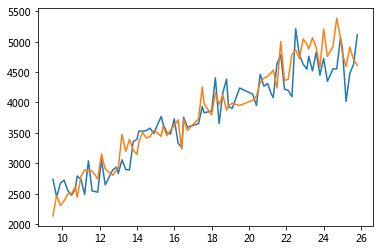

In [5]:
# 两个原核的面积随着时间变化的曲线
plt.plot(times,areas1)
plt.plot(times,areas2)